# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
import datetime as dt
import yfinance as yf
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation
from warnings import simplefilter

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()

# Fetch current ETH price
response_eth_data = requests.get(eth_url)
eth_data = response_eth_data.json()

# Compute current value of my crpto
# Assign CAD price
btc_cad_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
eth_cad_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Calculate crypto currency value
my_btc_value = btc_cad_price * my_btc
my_eth_value = eth_cad_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27266.99
The current value of your 5.3 ETH is $8771.24


### Collect Investments Data Using Yahoo Finance: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

### Please note, due to geographical difficulty (Canada) we are not able to register the Alpaca API. Therefore, we used Yahoo Finance library to fetch data.

In [7]:
# Set the tickers
agg_ticker = "AGG"
spy_ticker = "SPY"

# Get current closing prices for SPY and AGG
Start = dt.datetime(2021, 12, 20)
End = dt.datetime(2022, 12, 19)

# This function fetch ticker data and return hisorical ticker data as dataframe
def get_ticker_data(ticker, start, end):
    ticker_df = pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return ticker_df

# Fetch ticker data and assign to dataframe
agg_ticker_df = get_ticker_data(agg_ticker, Start, End)

spy_ticker_df = get_ticker_data(spy_ticker, Start, End)

# Reorganize the DataFrame
# Rename column name
agg_ticker_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy_ticker_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Concatenate the ticker DataFrames
crypto_df = pd.concat([agg_ticker_df,spy_ticker_df], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
crypto_df.head()

AGG                                      \
                                 open        high         low       close   
Date                                                                        
2021-12-20 00:00:00-05:00  111.989452  112.028552  111.745083  111.754860   
2021-12-21 00:00:00-05:00  111.500701  111.745070  111.402955  111.666870   
2021-12-22 00:00:00-05:00  111.754856  111.774402  111.598456  111.764626   
2021-12-23 00:00:00-05:00  111.715761  111.735308  111.500716  111.627785   
2021-12-27 00:00:00-05:00  111.578909  111.725532  111.559355  111.686432   

                                                                   SPY  \
                             volume Dividends Stock Splits        open   
Date                                                                     
2021-12-20 00:00:00-05:00   7382600       0.0            0  447.224535   
2021-12-21 00:00:00-05:00  12970200       0.0            0  451.288601   
2021-12-22 00:00:00-05:00   6171700       0.0            0  455.401894   
2021-12-23 00:00:00-05:00   5506700       0.0            0  461.266747   
2021-12-27 00:00:00-05:00   5436800       0.0            0  464.523872   

                                                                          \
                                 high         low       close     volume   
Date                                                                       
2021-12-20 00:00:00-05:00  448.129831  443.937859  447.716553  107134800   
2021-12-21 00:00:00-05:00  455.815171  449.025331  455.667572   69806300   
2021-12-22 00:00:00-05:00  460.341743  455.195225  460.223663   58890200   
2021-12-23 00:00:00-05:00  464.651832  461.158518  463.087219   56439700   
2021-12-27 00:00:00-05:00  469.690059  464.474682  469.640869   56808600   

                                                  
                          Dividends Stock Splits  
Date                                              
2021-12-20 00:00:00-05:00       0.0            0  
2021-12-21 00:00:00-05:00       0.0            0  
2021-12-22 00:00:00-05:00       0.0            0  
2021-12-23 00:00:00-05:00       0.0            0  
2021-12-27 00:00:00-05:00       0.0            0

In [8]:
# Pick AGG and SPY close prices
agg_close_price = crypto_df.iloc[0,3]
spy_close_price = crypto_df.iloc[0,10]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${round(agg_close_price,2)}")
print(f"Current SPY closing price: ${round(spy_close_price,2)}")

Current AGG closing price: $111.75
Current SPY closing price: $447.72


In [9]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22385.83
The current value of your 200 AGG shares is $22350.97


### Savings Health Analysis

In [10]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_cryptos = my_btc_value + my_eth_value

my_stocks = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame([my_cryptos,my_stocks], columns=["amount"])

# Set index
index = pd.Index(["crypto","shares"])
df_savings = df_savings.set_index(index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,36038.230943
shares,44736.799622


<AxesSubplot:title={'center':'Saving Portfolio Composition'}, ylabel='amount'>

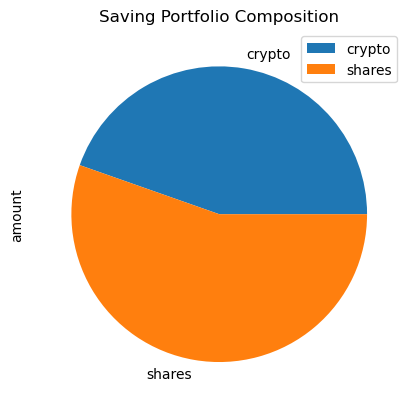

In [11]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Saving Portfolio Composition")

In [12]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
current_savings = df_savings.loc["crypto","amount"] + df_savings.loc["shares","amount"]

# Validate saving health
if current_savings > emergency_fund:
    print(f"Congraturations! your current savings are ${round(current_savings, 2)}, it is ${round((current_savings - emergency_fund),2)} above the emergency fund")
elif current_savings == emergency_fund:
    print(f"Congraturations! your current savings are ${round(current_savings, 2)}, which is exactly the same as the emergency fund")
else:
    print(f"Currently, you are ${round((emergency_fund - current_savings),2)} away from the emergency fund, keep on saving!!")

Congraturations! your current savings are $80775.03, it is $44775.03 above the emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

###  Please note, due to geographical difficulty (Canada) we are not able to register the Alpaca API. Therefore, we used Yahoo Finance library to fetch data.

In [13]:
# Get 5 years' worth of historical data for SPY and AGG
# Get current closing prices for SPY and AGG
# Set start and end dates of five years back from today.
Start = dt.datetime(2017, 12, 20)
End = dt.datetime(2022, 12, 19)

# This function fetch ticker data and return hisorical ticker data as dataframe
def get_ticker_data(ticker, start, end):
    ticker_df = pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return ticker_df

# Fetch ticker data and assign to dataframe
agg_ticker_history_df = get_ticker_data(agg_ticker, Start, End)

spy_ticker_history_df = get_ticker_data(spy_ticker, Start, End)

# Reorganize the DataFrame
# Rename column name
agg_ticker_history_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy_ticker_history_df.rename(columns = {'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Drop unnecessary columns
agg_ticker_history_df = agg_ticker_history_df.drop(axis=1, columns=["Dividends", "Stock Splits"])
spy_ticker_history_df = spy_ticker_history_df.drop(axis=1, columns=["Dividends", "Stock Splits"])

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_ticker_history_df,spy_ticker_history_df], axis=1, keys=["AGG","SPY"])

df_stock_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-20 00:00:00-05:00  96.506985  96.622348  96.471488  96.515862   
2017-12-21 00:00:00-05:00  96.547836  96.645486  96.521206  96.601097   
2017-12-22 00:00:00-05:00  96.601074  96.663213  96.592195  96.645462   
2017-12-26 00:00:00-05:00  96.680983  96.769753  96.645474  96.725365   
2017-12-27 00:00:00-05:00  96.778641  97.053837  96.778641  97.027206   

                                           SPY                          \
                            volume        open        high         low   
Date                                                                     
2017-12-20 00:00:00-05:00  4002500  246.307543  246.362629  244.856906   
2017-12-21 00:00:00-05:00  2374500  245.820962  246.417771  245.416981   
2017-12-22 00:00:00-05:00  3292800  245.692355  245.729088  245.049650   
2017-12-26 00:00:00-05:00  1873400  245.187442  245.545528  245.040566   
2017-12-27 00:00:00-05:00  2046900  245.490434  245.811786  245.150729   

                                                 
                                close    volume  
Date                                             
2017-12-20 00:00:00-05:00  245.169067  76751500  
2017-12-21 00:00:00-05:00  245.674057  67032300  
2017-12-22 00:00:00-05:00  245.609726  78720900  
2017-12-26 00:00:00-05:00  245.315994  45244400  
2017-12-27 00:00:00-05:00  245.435349  57751000

In [14]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist_thirty = MCSimulation(portfolio_data=df_stock_data, weights = [.4,.6],num_simulation = 500, num_trading_days = 252*30)

In [15]:
# Printing the simulation input data
MC_dist_thirty.portfolio_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-20 00:00:00-05:00  96.506985  96.622348  96.471488  96.515862   
2017-12-21 00:00:00-05:00  96.547836  96.645486  96.521206  96.601097   
2017-12-22 00:00:00-05:00  96.601074  96.663213  96.592195  96.645462   
2017-12-26 00:00:00-05:00  96.680983  96.769753  96.645474  96.725365   
2017-12-27 00:00:00-05:00  96.778641  97.053837  96.778641  97.027206   

                                                        SPY              \
                            volume daily_return        open        high   
Date                                                                      
2017-12-20 00:00:00-05:00  4002500          NaN  246.307543  246.362629   
2017-12-21 00:00:00-05:00  2374500     0.000883  245.820962  246.417771   
2017-12-22 00:00:00-05:00  3292800     0.000459  245.692355  245.729088   
2017-12-26 00:00:00-05:00  1873400     0.000827  245.187442  245.545528   
2017-12-27 00:00:00-05:00  2046900     0.003121  245.490434  245.811786   

                                                                          
                                  low       close    volume daily_return  
Date                                                                      
2017-12-20 00:00:00-05:00  244.856906  245.169067  76751500          NaN  
2017-12-21 00:00:00-05:00  245.416981  245.674057  67032300     0.002060  
2017-12-22 00:00:00-05:00  245.049650  245.609726  78720900    -0.000262  
2017-12-26 00:00:00-05:00  245.040566  245.315994  45244400    -0.001196  
2017-12-27 00:00:00-05:00  245.150729  245.435349  57751000     0.000487

In [16]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simplefilter(action="ignore", category=pd.errors.PerformanceWarning) # This function ignores warning message

MC_dist_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999805,0.995949,1.001177,0.992524,1.008861,0.997804,0.990269,0.989221,1.012236,1.014202,...,1.004082,1.008283,1.007174,0.996197,1.005856,1.005320,0.994740,0.996049,0.995952,0.998244
2,1.013158,0.997409,0.995842,1.000315,1.000292,0.993716,0.993599,0.995358,1.028077,1.015458,...,1.010263,1.010595,1.007861,0.977556,0.993657,1.017446,0.972587,0.987709,1.000277,0.986273
3,1.016383,0.983647,0.983260,0.992400,0.988499,0.987575,0.984995,1.001913,1.027834,1.004269,...,1.003474,1.014147,1.014237,0.983854,0.994807,1.044174,0.961691,0.981805,1.003731,0.984644
4,1.010137,0.979386,0.987437,0.997796,0.993817,0.974600,0.986017,0.995424,1.026641,1.010870,...,0.998911,1.011825,1.030559,0.971776,0.983245,1.046374,0.959742,0.969683,0.998333,0.974141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.575156,9.231630,16.221035,13.349489,1.822473,7.578859,14.879989,10.655863,4.777858,7.030824,...,16.428398,8.751066,10.270505,2.863080,4.805572,7.040198,5.233745,11.600620,3.219663,7.899674
7557,6.611130,9.145779,16.309075,13.243202,1.821533,7.570444,14.660637,10.684047,4.778018,7.013289,...,16.410529,8.645664,10.171721,2.879567,4.803171,7.045905,5.185506,11.694476,3.198648,7.832088
7558,6.625736,9.269948,16.134420,13.155925,1.835175,7.542552,14.581545,10.571752,4.743935,6.963604,...,16.385140,8.674199,10.171764,2.889970,4.764418,7.012005,5.228756,11.640342,3.179363,7.804677
7559,6.692649,9.149235,15.724596,13.083661,1.827932,7.610203,14.568214,10.628461,4.752559,7.055818,...,16.410983,8.574229,9.935558,2.872991,4.762783,6.979920,5.192063,11.561490,3.190746,7.711195


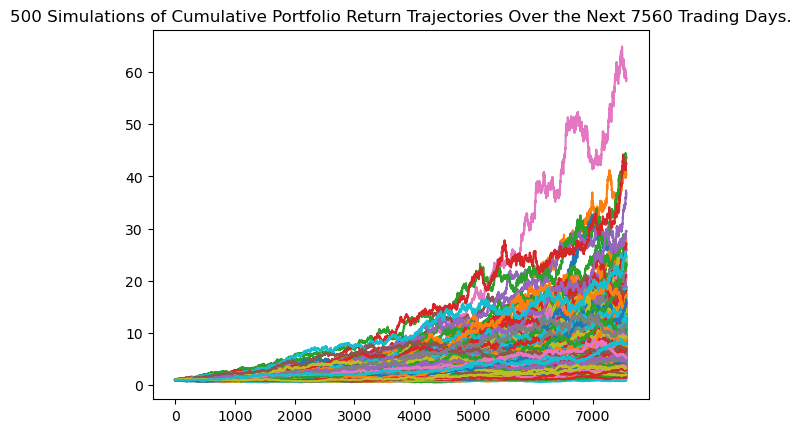

In [17]:
# Plot simulation outcomes
line_plot = MC_dist_thirty.plot_simulation()

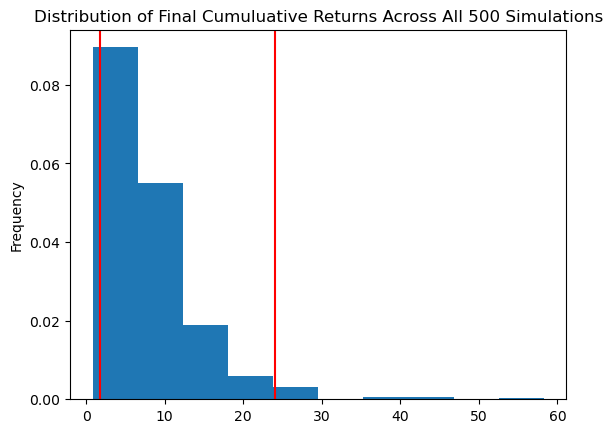

In [18]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_thirty.plot_distribution()

### Retirement Analysis

In [19]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat = MC_dist_thirty.summarize_cumulative_return()

# Print summary statistics
print(summary_stat)

count           500.000000
mean              8.134921
std               6.395135
min               0.860294
25%               3.872213
50%               6.486140
75%              10.758980
max              58.257999
95% CI Lower      1.725299
95% CI Upper     24.072072
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [20]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34505.97 and $481441.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [21]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $51758.96 and $722162.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [22]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Case 1: Increase stock ratio from 60% to 80%, and increase initial_investment to $60,000
MC_dist_portfolio_five = MCSimulation(portfolio_data=df_stock_data, weights = [.2,.8],num_simulation = 500, num_trading_days = 252*5)

In [23]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_portfolio_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987824,0.991818,0.980330,0.982071,0.994101,1.000114,0.994014,0.990359,1.010605,1.016023,...,1.009492,1.016784,1.000270,0.990591,1.004429,0.980577,1.003813,1.003040,1.006776,0.977202
2,0.988109,0.998472,0.984553,0.991004,0.992173,1.017319,0.987286,0.981069,0.997495,1.013644,...,1.003266,1.021007,0.996571,0.981307,0.998097,0.990985,0.977976,1.002420,1.013308,0.974406
3,0.997217,0.998995,0.966409,0.987423,0.984403,1.023674,1.015865,0.980839,0.983020,0.996959,...,0.995082,1.019073,1.003970,0.950838,0.992224,0.979881,0.984385,0.995669,1.010750,0.978594
4,1.016113,0.996866,0.952110,0.984553,0.983753,1.032991,1.004304,0.984140,0.969194,0.999483,...,0.996023,1.015359,1.022411,0.941837,0.997511,0.979674,0.975158,0.980195,1.015332,0.992021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.453683,0.945465,0.998052,1.253822,1.031248,1.315513,1.427494,1.737146,1.293920,0.941259,...,2.032535,2.162591,2.766165,1.384253,1.660584,1.059742,1.274415,0.880608,3.498545,2.190612
1257,1.465505,0.939767,1.002252,1.267810,1.000883,1.316255,1.447736,1.733450,1.285408,0.938810,...,2.030043,2.136482,2.717147,1.401295,1.675585,1.059019,1.284936,0.872648,3.588893,2.189889
1258,1.492467,0.954349,1.002120,1.273997,0.999678,1.326724,1.467389,1.747298,1.289794,0.907868,...,2.015086,2.136392,2.695400,1.421695,1.696113,1.052041,1.302154,0.860818,3.637969,2.207116
1259,1.478280,0.951656,1.034135,1.290025,1.011281,1.333266,1.449168,1.744184,1.277458,0.899104,...,2.006127,2.162983,2.677200,1.390597,1.697384,1.020131,1.296925,0.861135,3.640192,2.192952


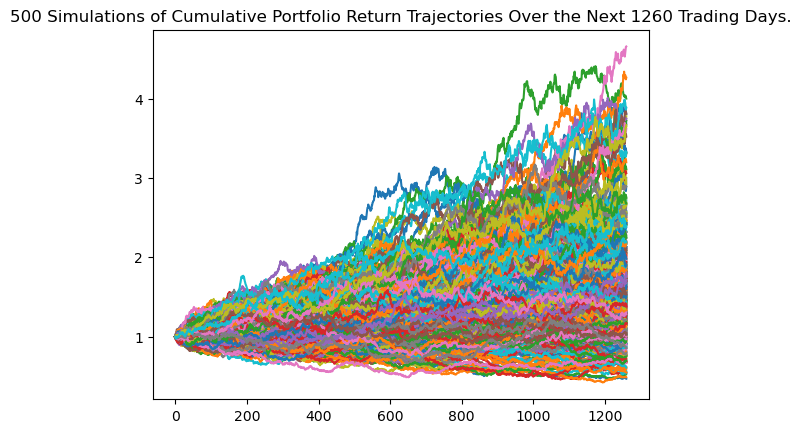

In [24]:
# Plot simulation outcomes
line_plot = MC_dist_portfolio_five.plot_simulation()

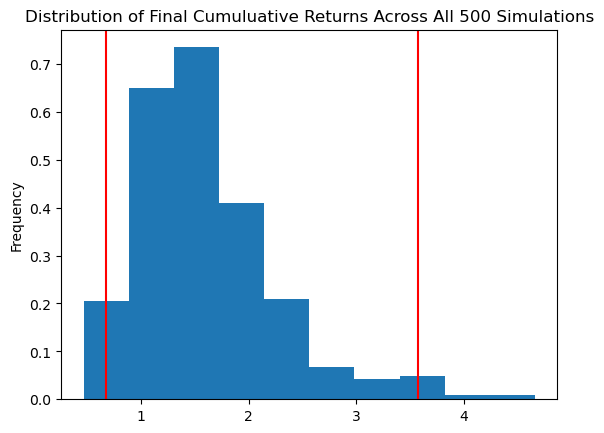

In [25]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_portfolio_five.plot_distribution()

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_portfolio_five_stat = MC_dist_portfolio_five.summarize_cumulative_return()

# Print summary statistics
print(summary_portfolio_five_stat)

count           500.000000
mean              1.611437
std               0.659173
min               0.468446
25%               1.177188
50%               1.498510
75%               1.862599
max               4.659905
95% CI Lower      0.672946
95% CI Upper      3.573983
Name: 1260, dtype: float64


In [27]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_portfolio_five_stat[8]*initial_investment,2)
ci_upper_five = round(summary_portfolio_five_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $40376.75 and $214439.01


### Ten Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Case 1: Increase stock ratio from 60% to 80%, and increase initial_investment to $60,000
MC_dist_portfolio_ten = MCSimulation(portfolio_data=df_stock_data, weights = [.2,.8],num_simulation = 500, num_trading_days = 252*10)

In [29]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_portfolio_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991487,1.015259,0.996039,1.017350,1.005515,1.015377,1.003171,1.005398,0.988723,0.996938,...,1.010471,1.024622,1.013922,0.990153,0.978021,0.981445,0.993361,0.997680,1.002875,1.004356
2,0.993826,1.019012,1.006895,1.022310,1.011650,1.023695,1.020436,0.994520,0.979986,0.992083,...,1.018324,1.018830,1.024814,0.974492,0.979177,0.993103,1.011482,1.008492,0.996626,1.000097
3,0.994896,1.034873,1.005359,1.014489,1.021672,1.021183,1.014462,1.005209,0.962799,0.998769,...,1.017489,1.017830,1.039514,0.959125,1.005536,0.980397,1.009859,1.030984,1.002982,1.012881
4,0.998913,1.035491,0.990155,1.031636,1.006771,1.007959,1.026329,1.019670,0.973891,0.998896,...,1.000258,1.021699,1.047876,0.956576,0.981875,0.986575,1.014618,1.009715,1.009153,1.015252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.001431,2.188853,6.193727,1.898568,2.148839,1.261522,1.333403,1.604061,1.152184,1.429006,...,3.774845,4.304391,1.121672,4.961691,3.210882,2.707158,1.995525,1.828038,3.703572,1.623094
2517,1.996638,2.210050,6.259844,1.900235,2.154458,1.267198,1.332143,1.567993,1.139334,1.436720,...,3.794499,4.303306,1.112769,4.989435,3.247089,2.722423,1.977860,1.806124,3.656535,1.652505
2518,2.026956,2.196537,6.357617,1.895255,2.162413,1.258938,1.346672,1.601468,1.150269,1.441292,...,3.701381,4.227112,1.102374,4.921451,3.208108,2.732705,1.962823,1.807637,3.681086,1.641197
2519,2.012311,2.191601,6.267161,1.889679,2.169858,1.267382,1.354127,1.624685,1.151200,1.433279,...,3.622920,4.288792,1.101896,5.025615,3.258309,2.759645,1.951865,1.820151,3.675371,1.619166


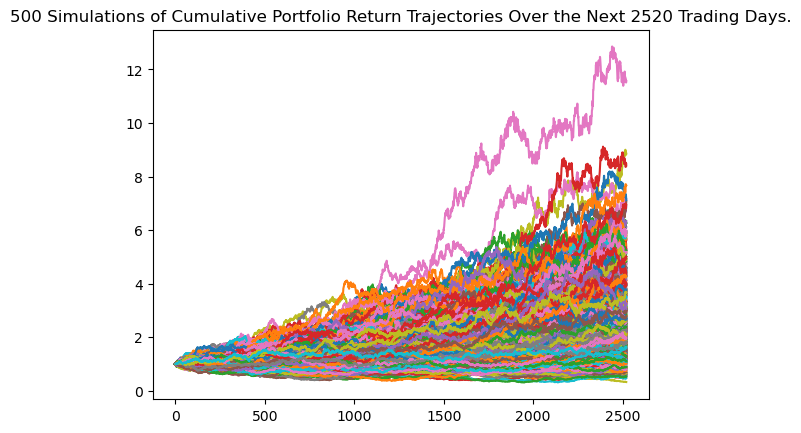

In [30]:
# Plot simulation outcomes
line_plot = MC_dist_portfolio_ten.plot_simulation()

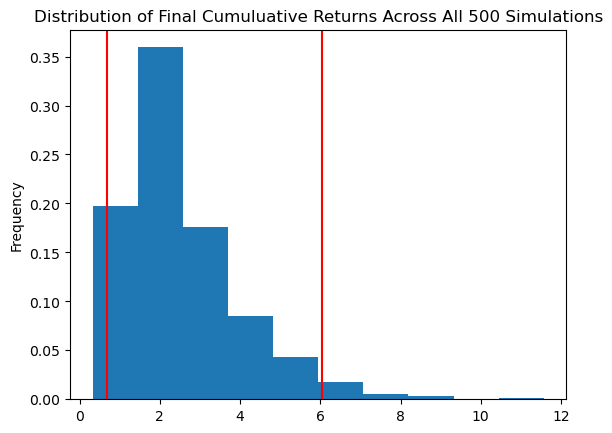

In [31]:
# Plot probability distribution and confidence intervals
dist_plot=MC_dist_portfolio_ten.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_portfolio_ten_stat = MC_dist_portfolio_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_portfolio_ten_stat)

count           500.000000
mean              2.537876
std               1.462486
min               0.330179
25%               1.518377
50%               2.196338
75%               3.193003
max              11.569403
95% CI Lower      0.687933
95% CI Upper      6.053849
Name: 2520, dtype: float64


In [33]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_portfolio_ten_stat[8]*initial_investment,2)
ci_upper_ten = round(summary_portfolio_ten_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $41275.96 and $363230.95
